Information about your group!

| <p style="text-align: center;">First Name</p> | <p style="text-align: center;">Family Name</p> | Matr.-No.   |
|-----------------------------------------------|------------------------------------------------|-------------|
| <p style="text-align: left">*Daniil*</p>      | <p style="text-align: left">*Krechko*</p>      | *k12149099* |
| <p style="text-align: left">*EDIT!*</p>       | <p style="text-align: left">*EDIT!*</p>        | *EDIT!*     |


<h2 style="text-align: center">344.105/6/7/12/13 UE: Natural Language Processing (WS2024/25)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.


    
</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of the assignment is to implement a document (sentence) classification model with (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment including the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum available in MOODLE. It is also recommended to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from the Moodle page of the course.

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.labels.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>



<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
**Preprocessing (5 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (5 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (5 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. One applied weighting must be `tf-idf` and the other one can be any other method discussed in the lecture such as `tc`, `tf`, `BM25`. These term weighting methods should be implemented; using a library to readily calculate the term weightings is not allowed. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

</div>

In [40]:
#Preprocessing

import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
# Tokenizer
nltk.download('averaged_perceptron_tagger')  # POS tagger
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4') 

#Remove commonest words - can be adjusted if some words from the list still cary important information for the model
#used for bag-of-words approach, this preprocessing technique can be removed if it doesn't fit our approach (list was proposed by chat gpt)
stop_words = {
    'the', 'a', 'and', 'to', 'be', 'in', 'that', 'of', 'for', 'on', 'with', 'at', 'by', 'an', 'this',
    'it', 'is', 'was', 'from', 'or', 'but', 'are', 'we', 'can', 'you', 'all', 'have', 'which',
    'there', 'their', 'they', 'who', 'about', 'were', 'had', 'has', 'will', 'my', 'your', 'more', 'if',
    'do', 'does', 'theirs', 'how', 'all', 'any', 'some', 'than', 'then', 'been', 'being',
    'i', 'me', 'us', 'he', 'she', 'him', 'her', 'ours', 'yours', 'ourselves', 'yourself', 'yourselves', 
    'himself', 'herself', 'itself', 'ours', 'those', 'such', 'same', 'so', 'up', 'down', 'where', 
    'when', 'out', 'just', 'over', 'after', 'before', 'once', 'during', 'also', 'because', 'now', 
    'off', 'here', 'one', 'each', 'both', 'either', 'every', 'other', 'again', 'between', 'few', 
    'own', 'against', 'into', 'under', 'above', 'upon', 'among', 'together', 'while', 'nor', 'could', 
    'would', 'should', 'might', 'must', 'very', 'without', 'within', 'through', 'around', 'towards', 
    'onto', 'yet', 'ever', 'always', 'often', 'almost', 'even', 'especially', 'mostly'
}


def remove_stop_words(text):
    # Split the text into words
    words = text.split()
    # Remove stop words from the list of words
    filtered_words = [word for word in words if word not in stop_words]
    # Join the filtered words back into a string
    return ' '.join(filtered_words)

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('NN'):
        return 'n'  # noun
    elif tag.startswith('VB'):
        return 'v'  # verb
    elif tag.startswith('JJ'):
        return 'a'  # adjective
    elif tag.startswith('RB'):
        return 'r'  # adverb
    else:
        return None

def lemmatize(tagged_sentence):
    lemmatized_words = []
    for word, tag in tagged_sentence:
        wordnet_pos = get_wordnet_pos(tag)
    
    # If the POS tag is not recognized, default to 'n' (noun)
        if wordnet_pos is None:
            wordnet_pos = 'n'
    
    # Lemmatize the word using the correct POS tag
        lemmatized_word = lemmatizer.lemmatize(word, wordnet_pos)
    
    # Append the lemmatized word to the list
        lemmatized_words.append(lemmatized_word)
    return lemmatized_words

def preprocessing(data):
    # Punctuation Cleaning
    
    pattern_2 = r'^"|"$'
    data['Text'] = data['Text'].apply(lambda x: re.sub(pattern_2, '', x))
    
    pattern_3 = r'\s+'
    data['Text'] = data['Text'].apply(lambda x: re.sub(pattern_3, ' ', x))
    
    # Num and Date placeholders
    written_date_pattern = r'\b(?:\d{1,2}(?:st|nd|rd|th)?\s*)?(?:January|February|March|April|May|June|July|August|September|October|November|December)\s*(?:\d{1,2}(?:st|nd|rd|th)?)?\s*(?:\d{4})?\b'
    data['Text'] = data['Text'].apply(lambda x: re.sub(written_date_pattern, '|date| ', x))
    
    percent_pattern = r'\b\d+(?:\s*(?:percent|per\s*cent|%))\b'
    number_pattern = r'\b(?:\d{1,3}(?:[\.,\s]?\d{3})*(?:[\.,]?\d+)?(?:\s*(?:hundred|thousand|million|billion|trillion|k|K|m|M))?|\d+(?:\.\d+)?(?:\s*(?:kg|g|lbs|cm|m|km|ft|in))?)\b'
    percent_patter_0 = r'.*%'
    
    data['Text'] = data['Text'].apply(lambda x: re.sub(percent_pattern, '|num| ', x))
    data['Text'] = data['Text'].apply(lambda x: re.sub(number_pattern, '|num| ', x))
    data['Text'] = data['Text'].apply(lambda x: re.sub(percent_patter_0, '', x))
    
    # Remove marks
    marks_pattern = r'[^\w\s|]'
    data['Text'] = data['Text'].apply(lambda x: re.sub(marks_pattern, ' ', x))
    
    # Convert text to lowercase
    data['Text'] = data['Text'].apply(lambda x: x.lower())
    data['Text'] = data['Text'].apply(remove_stop_words)
    
    # Remove extra whitespace
    data['Text'] = data['Text'].apply(lambda x: re.sub(pattern_3, ' ', x))
    
    # Tokenize and lemmatize
    words = data['Text'].apply(word_tokenize)
    tagged_words = words.apply(pos_tag)
    data['Text'] = tagged_words.apply(lemmatize)
    
    # Replace |num| and |date| back to <num> and <date>
    data['Text'] = data['Text'].apply(lambda tokens: [token.replace('|num|', '<num>').replace('|date|', '<date>') for token in tokens])
    
    return data



    


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azatv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\azatv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\azatv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\azatv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\azatv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\azatv\AppData\Roaming\nltk_dat

In [41]:
from IPython.display import display
train = pd.read_csv(r"C:\Users\azatv\Jupyter\JupyterProjects\test\nlp2024_25_data\nlp2023_24_data\thedeep.subset.train.txt", sep=",", header=None, names=['ID', 'Text', 'Label'], quoting=1, encoding='utf-8')
validation = pd.read_csv(r"C:\Users\azatv\Jupyter\JupyterProjects\test\nlp2024_25_data\nlp2023_24_data\thedeep.subset.validation.txt", sep=",", header=None, names=['ID', 'Text', 'Label'], quoting=1, encoding='utf-8')
test = pd.read_csv(r"C:\Users\azatv\Jupyter\JupyterProjects\test\nlp2024_25_data\nlp2023_24_data\thedeep.subset.test.txt", sep=",", header=None, names=['ID', 'Text', 'Label'], quoting=1, encoding='utf-8')

train = train.drop('ID', axis=1)
validation = validation.drop('ID', axis=1)
test = test.drop('ID', axis=1)

train = preprocessing(train)
validation = preprocessing(validation)
test = preprocessing(test)

print("Train Data:")
display(train.head())


Train Data:


,Text,Label
0,"[addition, immediate, life, save, intervention...",9
1,"[approximately, <num>, people, classify, phase...",3
2,"[aid, import, hold, recently, commercial, food...",5
3,"[heavy, rainfall, as, well, a, onrush, water, ...",0
4,"[base, field, report, <num>, main, production,...",3


In [42]:
#Vocabluary dictionary creation
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
def full_vocabluary(data):
    # Flatten token lists from each document in the training set
    all_tokens = [token for doc in data['Text'] for token in doc]

    # Count frequencies of each token
    token_counts = Counter(all_tokens)

    # Create the initial dictionary (vocab) with token and frequency
    vocab = dict(token_counts)
    return vocab

def token_statistics(vocab):
    # Exclude placeholders `<num>` and `<date>`
    filtered_vocab_1 = {token: count for token, count in vocab.items() if token not in {'<num>', '<date>'}}
    
    counts = list(filtered_vocab_1.values())  # Get the token counts from the filtered vocabulary
    mean_1 = np.mean(counts)
    max_count_1 = np.max(counts)
    min_count_1 = np.min(counts)
    std_dev_1 = np.std(counts)

    return mean_1, max_count_1, min_count_1, std_dev_1

vocab_train = full_vocabluary(train)

# Recalculate statistics without `<num>` and `<date>`
mean_1, max_count_1, min_count_1, std_dev_1 = token_statistics(vocab_train)
print("Stats of the dictionary before reduction:")
print(f"Mean (excluding <num> and <date>): {mean_1}")
print(f"Max (excluding <num> and <date>): {max_count_1}")
print(f"Min (excluding <num> and <date>): {min_count_1}")
print(f"Standard Deviation (excluding <num> and <date>): {std_dev_1}")


# # Define a frequency threshold
#We excluded the placeholders for time and date (outliers) and also removed the stop words in earlier preprocessing, so considering that this noise was already removed let's choose a treshold of mean/2 and can adjust it later if needed
min_freq = 10
def filter_vocab(vocab, min_freq):
    filtered_vocab = {token: count for token, count in vocab.items() if count >= min_freq}
    return filtered_vocab
vocab_train_copy = vocab_train
train_filtered_vocab = filter_vocab(vocab_train_copy, min_freq)
# # # Keep the top N most common tokens
# # top_n = 5000  # Example top N, adjust as needed
# # filtered_vocab = dict(token_counts.most_common(top_n))

def replace_with_oov(data, vocab):
    return [[token if token in vocab else '<OOV>' for token in doc] for doc in data['Text']]
train_data = replace_with_oov(train, train_filtered_vocab)
test_data = replace_with_oov(test, train_filtered_vocab)
validation_data = replace_with_oov(validation, train_filtered_vocab)

display(train_data[:5])






Stats of the dictionary before reduction:
Mean (excluding <num> and <date>): 20.40027304355485
Max (excluding <num> and <date>): 4168
Min (excluding <num> and <date>): 1
Standard Deviation (excluding <num> and <date>): 114.90054346575677


[['addition',
  'immediate',
  'life',
  'save',
  'intervention',
  'unicef',
  'take',
  'action',
  'protect',
  '<num>',
  'child',
  'arrive',
  'camp',
  'angola',
  'family'],
 ['approximately',
  '<num>',
  'people',
  'classify',
  'phase',
  '<num>',
  'already',
  'emergency',
  'ipc',
  'phase',
  '<num>',
  'not',
  'meet',
  'threshold',
  '<num>',
  'population',
  'phase',
  'area',
  'classify',
  'phase',
  '<num>',
  'county',
  'classify',
  'crisis',
  'ipc',
  'phase',
  '<num>',
  'turkana',
  'marsabit',
  'west',
  'pokot',
  'samburu',
  'isiolo',
  'lamu',
  'as',
  'well',
  'a',
  'part',
  'mandera',
  'wajir',
  'garissa',
  'baringo',
  'laikipia',
  'kilifi',
  'kwale',
  'household',
  'category',
  'marginally',
  'able',
  'meet',
  'minimum',
  'food',
  'need',
  'only',
  'rapidly',
  'deplete',
  'asset',
  'thus',
  'undermine',
  'food',
  'consumption',
  'absence',
  'adequate',
  'cross',
  'sectoral',
  'intervention',
  'area',
  'househol

In [43]:
#Dictionary stats after reduction
def token_statistics_after(vocab_filtered):
    # Exclude placeholders `<num>` and `<date>`
    filtered_vocab_2 = {token: count for token, count in vocab_filtered.items() if token not in {'<num>', '<date>'}}
    
    counts = list(filtered_vocab_2.values())  # Get the token counts from the filtered vocabulary
    mean_2 = np.mean(counts)
    max_count_2 = np.max(counts)
    min_count_2 = np.min(counts)
    std_dev_2 = np.std(counts)

    return mean_2, max_count_2, min_count_2, std_dev_2
mean_2, max_count_2, min_count_2, std_dev_2 = token_statistics_after(train_filtered_vocab)

print("Stats of the dictionary after reduction:")
print(f"Mean (excluding <num> and <date>): {mean_2}")
print(f"Max (excluding <num> and <date>): {max_count_2}")
print(f"Min (excluding <num> and <date>): {min_count_2}")
print(f"Standard Deviation (excluding <num> and <date>): {std_dev_2}")


Stats of the dictionary after reduction:
Mean (excluding <num> and <date>): 102.86843385214007
Max (excluding <num> and <date>): 4168
Min (excluding <num> and <date>): 10
Standard Deviation (excluding <num> and <date>): 254.131483202202


In [44]:
#Creating sentence vectors
# Create a list of words from the vocabulary
vocab_list = sorted(train_filtered_vocab.keys())
word_to_index = {word: idx for idx, word in enumerate(vocab_list)}
vocab_size = len(vocab_list)
print(f"Vocabulary Size: {vocab_size}")



Vocabulary Size: 4114


In [45]:

def calculate_document_frequencies(data, word_to_index):
    df = np.zeros(vocab_size, dtype=int)
    for doc in data:
        unique_terms = set(doc)
        for term in unique_terms:
            if term in word_to_index:
                index = word_to_index[term]
                df[index] += 1
    return df

# Calculate DF using the training data
df = calculate_document_frequencies(train_data, word_to_index)
N = len(train_data)  # Total number of documents in the training set


In [46]:
#TF weighting method
def compute_tf_vectors(data, word_to_index):
    vectors = []
    for doc in data:
        vector = np.zeros(vocab_size)
        for term in doc:
            if term in word_to_index:
                index = word_to_index[term]
                vector[index] += 1  # Increment term frequency
        vectors.append(vector)
    return vectors

# Compute TF vectors for train, validation, and test sets
tf_train_vectors = compute_tf_vectors(train_data, word_to_index)
tf_validation_vectors = compute_tf_vectors(validation_data, word_to_index)
tf_test_vectors = compute_tf_vectors(test_data, word_to_index)


In [47]:
#TF-IDF weighting method
def compute_tfidf_vectors(data, word_to_index, df, N):
    # Calculate IDF vector
    idf = np.log(N / (df + 1))  # Adding 1 to DF to avoid division by zero

    vectors = []
    for doc in data:
        vector = np.zeros(vocab_size)
        term_counts = Counter(doc)
        for term, count in term_counts.items():
            if term in word_to_index:
                index = word_to_index[term]
                tf = count  # Raw term frequency
                vector[index] = tf * idf[index]
        vectors.append(vector)
    return vectors

# Compute TF-IDF vectors for train, validation, and test sets
tfidf_train_vectors = compute_tfidf_vectors(train_data, word_to_index, df, N)
tfidf_validation_vectors = compute_tfidf_vectors(validation_data, word_to_index, df, N)
tfidf_test_vectors = compute_tfidf_vectors(test_data, word_to_index, df, N)


In [48]:
#Sparsity rate
def calculate_sparsity(vectors):
    total_elements = 0
    zero_elements = 0
    for vector in vectors:
        total_elements += len(vector)
        zero_elements += np.count_nonzero(vector == 0)
    sparsity_rate = (zero_elements / total_elements) * 100
    return sparsity_rate

# Calculate sparsity rates for TF vectors
tf_train_sparsity = calculate_sparsity(tf_train_vectors)
tf_validation_sparsity = calculate_sparsity(tf_validation_vectors)
tf_test_sparsity = calculate_sparsity(tf_test_vectors)

# Calculate sparsity rates for TF-IDF vectors
tfidf_train_sparsity = calculate_sparsity(tfidf_train_vectors)
tfidf_validation_sparsity = calculate_sparsity(tfidf_validation_vectors)
tfidf_test_sparsity = calculate_sparsity(tfidf_test_vectors)

# Report the sparsity rates
print(f"TF Train Sparsity Rate: {tf_train_sparsity:.2f}%")
print(f"TF Validation Sparsity Rate: {tf_validation_sparsity:.2f}%")
print(f"TF Test Sparsity Rate: {tf_test_sparsity:.2f}%")

print(f"TF-IDF Train Sparsity Rate: {tfidf_train_sparsity:.2f}%")
print(f"TF-IDF Validation Sparsity Rate: {tfidf_validation_sparsity:.2f}%")
print(f"TF-IDF Test Sparsity Rate: {tfidf_test_sparsity:.2f}%")


TF Train Sparsity Rate: 99.29%
TF Validation Sparsity Rate: 99.31%
TF Test Sparsity Rate: 99.30%
TF-IDF Train Sparsity Rate: 99.29%
TF-IDF Validation Sparsity Rate: 99.31%
TF-IDF Test Sparsity Rate: 99.30%


<a name="section-training"></a><h2 style="color:rgb(0,120,170)">Task B: Training and Results Analysis (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

To evaluate the models, use <ins>accuracy</ins> as the metric. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>four experiment sets</ins> (2 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters. For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>three values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation, reporting results, and discussion (3 point).** Evaluate the selected models of the four experiments on the test set. Report the results of <ins>the four experiments on both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different experiments and models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.


</div>

Dummy Baseline Validation Accuracy: 0.2562
Dummy Baseline Test Accuracy: 0.2447
Logistic Regression (TF) - C=0.01 - Validation Accuracy: 0.7404
Logistic Regression (TF) - C=0.1 - Validation Accuracy: 0.7797
Logistic Regression (TF) - C=1 - Validation Accuracy: 0.7720
Logistic Regression (TF) - C=10 - Validation Accuracy: 0.7519
Best Logistic Regression (TF) Test Accuracy: 0.7680
Logistic Regression (TF-IDF) - C=0.01 - Validation Accuracy: 0.6445
Logistic Regression (TF-IDF) - C=0.1 - Validation Accuracy: 0.6772
Logistic Regression (TF-IDF) - C=1 - Validation Accuracy: 0.6810
Logistic Regression (TF-IDF) - C=10 - Validation Accuracy: 0.6772
Best Logistic Regression (TF-IDF) Test Accuracy: 0.7380
Random Forest (TF) - n_estimators=50 - Validation Accuracy: 0.7558
Random Forest (TF) - n_estimators=100 - Validation Accuracy: 0.7585
Random Forest (TF) - n_estimators=150 - Validation Accuracy: 0.7569
Best Random Forest (TF) Test Accuracy: 0.7603
Random Forest (TF-IDF) - n_estimators=50 - Vali

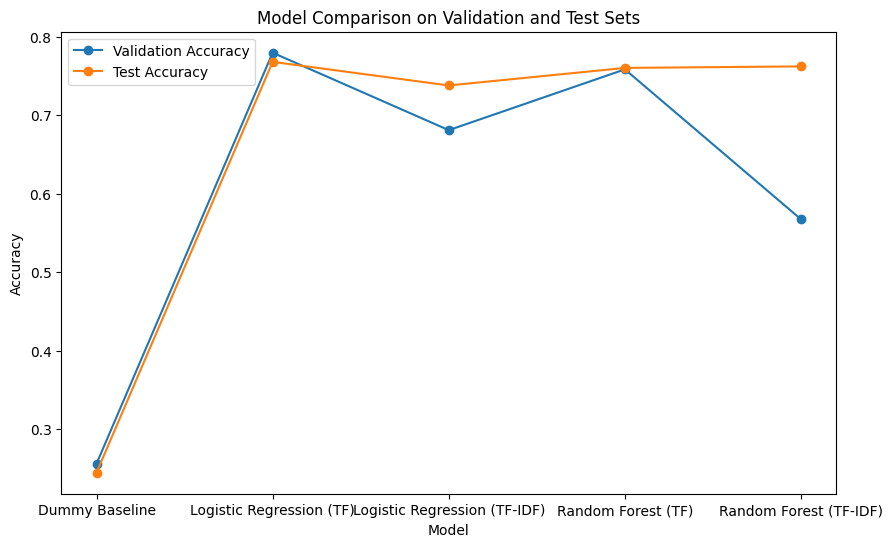

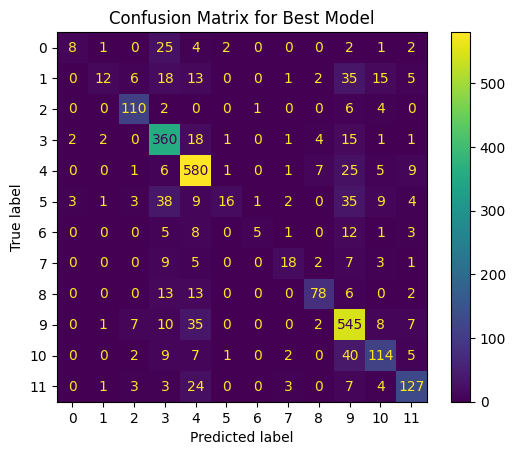

In [49]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


y_train = train["Label"]
y_val = validation['Label']
y_test = test['Label']

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(tf_train_vectors, y_train)

val_baseline_preds = dummy_clf.predict(tf_validation_vectors)
test_baseline_preds = dummy_clf.predict(tf_test_vectors)
val_baseline_accuracy = accuracy_score(y_val, val_baseline_preds)
test_baseline_accuracy = accuracy_score(y_test, test_baseline_preds)
print(f"Dummy Baseline Validation Accuracy: {val_baseline_accuracy:.4f}")
print(f"Dummy Baseline Test Accuracy: {test_baseline_accuracy:.4f}")

c_values = [0.01, 0.1, 1, 10]
best_val_accuracy_lr_tf = 0
best_c_tf = None
for c in c_values:
    lr_tf = LogisticRegression(C=c, max_iter=1000)
    lr_tf.fit(tf_train_vectors, y_train)
    val_preds = lr_tf.predict(tf_validation_vectors)
    val_accuracy = accuracy_score(y_val, val_preds)
    print(f"Logistic Regression (TF) - C={c} - Validation Accuracy: {val_accuracy:.4f}")
    if val_accuracy > best_val_accuracy_lr_tf:
        best_val_accuracy_lr_tf = val_accuracy
        best_c_tf = c

lr_tf_best = LogisticRegression(C=best_c_tf, max_iter=1000)
lr_tf_best.fit(tf_train_vectors, y_train)
test_preds_tf = lr_tf_best.predict(tf_test_vectors)
test_accuracy_tf = accuracy_score(y_test, test_preds_tf)
print(f"Best Logistic Regression (TF) Test Accuracy: {test_accuracy_tf:.4f}")

best_val_accuracy_lr_tfidf = 0
best_c_tfidf = None
for c in c_values:
    lr_tfidf = LogisticRegression(C=c, max_iter=1000)
    lr_tfidf.fit(tfidf_train_vectors, y_train)
    val_preds = lr_tfidf.predict(tf_validation_vectors)
    val_accuracy = accuracy_score(y_val, val_preds)
    print(f"Logistic Regression (TF-IDF) - C={c} - Validation Accuracy: {val_accuracy:.4f}")
    if val_accuracy > best_val_accuracy_lr_tfidf:
        best_val_accuracy_lr_tfidf = val_accuracy
        best_c_tfidf = c

lr_tfidf_best = LogisticRegression(C=best_c_tfidf, max_iter=1000)
lr_tfidf_best.fit(tfidf_train_vectors, y_train)
test_preds_tfidf = lr_tfidf_best.predict(tfidf_test_vectors)
test_accuracy_tfidf = accuracy_score(y_test, test_preds_tfidf)
print(f"Best Logistic Regression (TF-IDF) Test Accuracy: {test_accuracy_tfidf:.4f}")

n_estimators_values = [50, 100, 150]
best_val_accuracy_rf_tf = 0
best_n_tf = None
for n in n_estimators_values:
    rf_tf = RandomForestClassifier(n_estimators=n)
    rf_tf.fit(tf_train_vectors, y_train)
    val_preds = rf_tf.predict(tf_validation_vectors)
    val_accuracy = accuracy_score(y_val, val_preds)
    print(f"Random Forest (TF) - n_estimators={n} - Validation Accuracy: {val_accuracy:.4f}")
    if val_accuracy > best_val_accuracy_rf_tf:
        best_val_accuracy_rf_tf = val_accuracy
        best_n_tf = n

rf_tf_best = RandomForestClassifier(n_estimators=best_n_tf)
rf_tf_best.fit(tf_train_vectors, y_train)
test_preds_rf_tf = rf_tf_best.predict(tf_test_vectors)
test_accuracy_rf_tf = accuracy_score(y_test, test_preds_rf_tf)
print(f"Best Random Forest (TF) Test Accuracy: {test_accuracy_rf_tf:.4f}")

best_val_accuracy_rf_tfidf = 0
best_n_tfidf = None
for n in n_estimators_values:
    rf_tfidf = RandomForestClassifier(n_estimators=n)
    rf_tfidf.fit(tfidf_train_vectors, y_train)
    val_preds = rf_tfidf.predict(tf_validation_vectors)
    val_accuracy = accuracy_score(y_val, val_preds)
    print(f"Random Forest (TF-IDF) - n_estimators={n} - Validation Accuracy: {val_accuracy:.4f}")
    if val_accuracy > best_val_accuracy_rf_tfidf:
        best_val_accuracy_rf_tfidf = val_accuracy
        best_n_tfidf = n

rf_tfidf_best = RandomForestClassifier(n_estimators=best_n_tfidf)
rf_tfidf_best.fit(tfidf_train_vectors, y_train)
test_preds_rf_tfidf = rf_tfidf_best.predict(tfidf_test_vectors)
test_accuracy_rf_tfidf = accuracy_score(y_test, test_preds_rf_tfidf)
print(f"Best Random Forest (TF-IDF) Test Accuracy: {test_accuracy_rf_tfidf:.4f}")

results = {
    "Model": ["Dummy Baseline", "Logistic Regression (TF)", "Logistic Regression (TF-IDF)",
              "Random Forest (TF)", "Random Forest (TF-IDF)"],
    "Validation Accuracy": [val_baseline_accuracy, best_val_accuracy_lr_tf, best_val_accuracy_lr_tfidf,
                            best_val_accuracy_rf_tf, best_val_accuracy_rf_tfidf],
    "Test Accuracy": [test_baseline_accuracy, test_accuracy_tf, test_accuracy_tfidf,
                      test_accuracy_rf_tf, test_accuracy_rf_tfidf]
}
results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(10, 6))
plt.plot(results_df["Model"], results_df["Validation Accuracy"], label="Validation Accuracy", marker='o')
plt.plot(results_df["Model"], results_df["Test Accuracy"], label="Test Accuracy", marker='o')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Comparison on Validation and Test Sets")
plt.show()

best_model = rf_tf_best
cm = confusion_matrix(y_test, test_preds_rf_tf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix for Best Model")
plt.show()


<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">
Train a logistic regression model on one of the document representations. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>

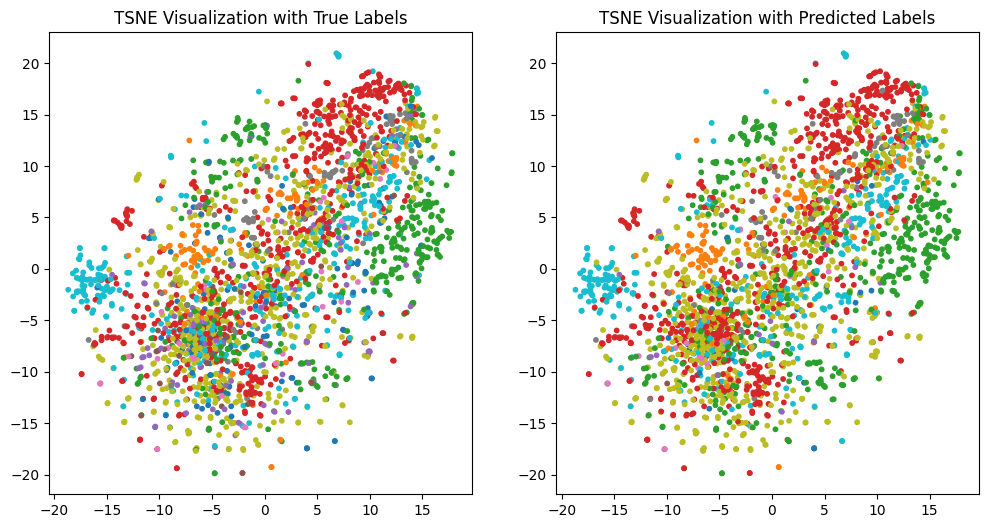

In [50]:
import numpy as np

tf_test_vectors = np.array(tf_test_vectors)

tsne = TSNE(n_components=2, random_state=42)
test_vectors_2d = tsne.fit_transform(tf_test_vectors) 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(test_vectors_2d[:, 0], test_vectors_2d[:, 1], c=y_test, cmap='tab10', s=10)
plt.title("TSNE Visualization with True Labels")

plt.subplot(1, 2, 2)
plt.scatter(test_vectors_2d[:, 0], test_vectors_2d[:, 1], c=test_preds_rf_tf, cmap='tab10', s=10)
plt.title("TSNE Visualization with Predicted Labels")
plt.show()
